In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd

In [ ]:
dataset = pd.read_csv('/content/Wholesale customers data.csv')

In [ ]:
'''

Attribute Information:

1) FRESH: annual spending (m.u.) on fresh products (Continuous);
2) MILK: annual spending (m.u.) on milk products (Continuous);
3) GROCERY: annual spending (m.u.)on grocery products (Continuous);
4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
7) CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
8) REGION: customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal)
Descriptive Statistics:

(Minimum, Maximum, Mean, Std. Deviation)
FRESH ( 3, 112151, 12000.30, 12647.329)
MILK (55, 73498, 5796.27, 7380.377)
GROCERY (3, 92780, 7951.28, 9503.163)
FROZEN (25, 60869, 3071.93, 4854.673)
DETERGENTS_PAPER (3, 40827, 2881.49, 4767.854)
DELICATESSEN (3, 47943, 1524.87, 2820.106)
'''

'\n\nAttribute Information:\n\n1) FRESH: annual spending (m.u.) on fresh products (Continuous);\n2) MILK: annual spending (m.u.) on milk products (Continuous);\n3) GROCERY: annual spending (m.u.)on grocery products (Continuous);\n4) FROZEN: annual spending (m.u.)on frozen products (Continuous)\n5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)\n6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);\n7) CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)\n8) REGION: customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal)\nDescriptive Statistics:\n\n(Minimum, Maximum, Mean, Std. Deviation)\nFRESH ( 3, 112151, 12000.30, 12647.329)\nMILK (55, 73498, 5796.27, 7380.377)\nGROCERY (3, 92780, 7951.28, 9503.163)\nFROZEN (25, 60869, 3071.93, 4854.673)\nDETERGENTS_PAPER (3, 40827, 2881.49, 4767.854)\nDELICATESSEN (3, 47943, 1524.87, 2820.106)\n'

In [ ]:
dataset.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
#Preprocessing

In [ ]:
from sklearn.preprocessing import normalize

In [ ]:
data_scalar = normalize(dataset)

In [ ]:
data_scaled = pd.DataFrame(data_scalar,columns=dataset.columns)

In [ ]:
data_scaled

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294
...,...,...,...,...,...,...,...,...
435,0.000026,0.000078,0.776890,0.315197,0.419191,0.343549,0.004760,0.057646
436,0.000025,0.000076,0.990872,0.036146,0.019298,0.113919,0.002349,0.059258
437,0.000050,0.000075,0.364462,0.388465,0.758545,0.010961,0.372237,0.046827
438,0.000091,0.000273,0.937737,0.180530,0.203404,0.094594,0.015310,0.193653


In [ ]:
X = data_scaled

In [ ]:
import scipy.cluster.hierarchy as sch

Text(0, 0.5, 'Euclidean Distance')

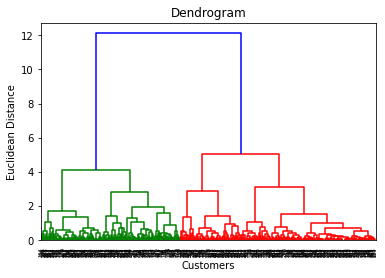

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(X,method= 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')

In [ ]:
data_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Channel           440 non-null    float64
 1   Region            440 non-null    float64
 2   Fresh             440 non-null    float64
 3   Milk              440 non-null    float64
 4   Grocery           440 non-null    float64
 5   Frozen            440 non-null    float64
 6   Detergents_Paper  440 non-null    float64
 7   Delicassen        440 non-null    float64
dtypes: float64(8)
memory usage: 27.6 KB


In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
hc = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='complete')
y_hc = hc.fit_predict(X)

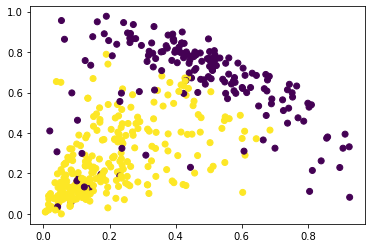

In [ ]:
plt.scatter(X['Milk'],X['Grocery'],c= y_hc)

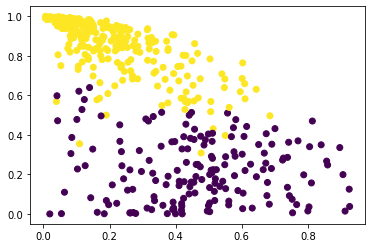

In [ ]:
plt.scatter(X['Milk'],X['Fresh'],c= y_hc) 

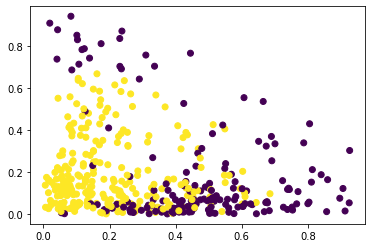

In [ ]:
plt.scatter(X['Milk'],X['Frozen'],c = y_hc)

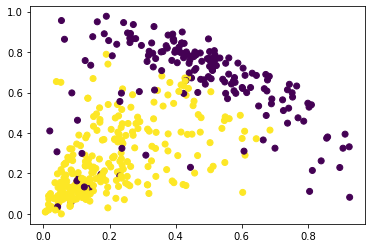

In [ ]:
plt.scatter(X['Milk'],X['Grocery'],c= y_hc) 

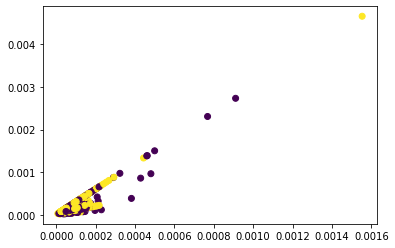

In [ ]:
plt.scatter(X['Channel'],X['Region'],c = hc.labels_)